NO GO ZONE


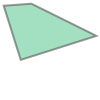

In [14]:
from shapely.ops import split
from shapely import GeometryCollection, Polygon, LineString, difference, intersection

def swap(polygon):
    result = [(coord[1], coord[0]) for coord in polygon]
    return result

# swap because geoJSON lon first
nogo_zone1 = swap(
    [
        [43.107064367495, 35.15697128055],
        [43.100520570157, 35.159031217074],
        [43.104324685807, 35.167871777987],
        [43.107279055816, 35.159889523958],
    ]
)

nogo_zone1_polygon_without_buffer: Polygon = Polygon(nogo_zone1).buffer(
    0.001, join_style=2
)

print("NO GO ZONE")
nogo_zone1 = Polygon(nogo_zone1)
nogo_zone1


FROM POINT TO POINT


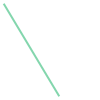

In [15]:
# [35.14627, 43.06035, 1000] [35.15563821055584, 43.10796756750554, 1000]

from_coord = (35.14627, 43.06035)
to_coord = (43.10925, 35.16032)


from_coord = (35.16774, 43.09616)
to_coord = (35.15402, 43.11903)

print("FROM POINT TO POINT")
spliter = LineString([from_coord, to_coord])
spliter

GEOMS WITH SPLIT


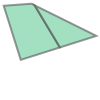

In [16]:
geoms: GeometryCollection = split(nogo_zone1, spliter)

print("GEOMS WITH SPLIT")
geoms

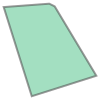

In [17]:
poly1, poly2 = geoms.geoms
poly1

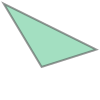

In [18]:
poly2

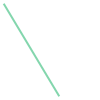

In [19]:
ls = LineString([*poly1.exterior.coords])
intersection_polyline_betwean_spliter_and_linestring = intersection(ls, spliter) # intersection
intersection_polyline_betwean_spliter_and_linestring

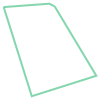

In [20]:
path: LineString = difference(ls, intersection_polyline_betwean_spliter_and_linestring)
path

In [21]:
"""_summary_
now we should calculate distance and compare it with the other path
"""

'_summary_\nnow we should calculate distance and compare it with the other path\n'

In [22]:
# now we should add the start point and end point
path_with_points = LineString([from_coord,*path.coords, to_coord])
path_with_points

NotImplementedError: Sub-geometries may have coordinate sequences, but multi-part geometries do not